# Mini Trabalho 1

In [1]:
import random
import time
import matplotlib.pyplot as plt
import math

#### 1. Gerar aleatoriamente uma coleção de inteiros numa list

Podemos indicar parâmetros opcionais como o tamanho (**size**) da lista desejada e o range (**r**) de números contida nela

In [2]:
def randomIntList(size=25, r=[-1000,1000]):
    return [random.randint(r[0], r[1]) for i in range(size)]


In [3]:
print(randomIntList())
print(list(range(25)))

[-958, -318, -265, -35, -495, -510, -864, -230, 171, 840, -956, 157, -595, 340, 679, 564, -824, 709, 191, 22, 98, 446, 255, 309, 76]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


#### 2. Implementação de algoritmos de ordenamento comuns

In [4]:
def BubbleSort(values):
    for i in range(len(values)):
        c=False
        for j in range(len(values)-1-i):
            if values[j] > values[j+1]:
                values[j], values[j+1] = values[j+1], values[j]
                c=True
        if not c: break

def SelectionSort(values):
    for i in range(len(values)):
        minimum = i
        for j in range(i, len(values)):
            if values[minimum] > values[j]:
                minimum = j
        values[i],values[minimum] = values[minimum], values[i]

def InsertionSort(values):
    for i in range(1,len(values)):
        current = values[i]
        j = i-1
        while j >= 0 and values[j] > current:
            values[j+1] = values[j]
            j -= 1
        values[j+1] = current

def ShellSort(values):
    gap = 1
    k=1
    while gap < len(values)/3:
        k+=1
        gap = int((3**k -1)/2)

    while gap > 0:
        for i in range(gap, len(values)):
            for j in range(i-gap, -1, -gap):
                if values[j+gap] <= values[j]:
                    values[j] , values[j+gap] = values[j+gap] , values[j]
                else:
                    break
        gap= int((gap-1)/3)

def MergeSort(values):
    if len(values) > 1:
        M = int(len(values)/2)
        L_arr, R_arr = values[:M], values[M:]
        MergeSort(L_arr)
        MergeSort(R_arr)

        L = R = V = 0
        while L<len(L_arr) and R<len(R_arr):
            if L_arr[L] >= R_arr[R]:
                values[V] = R_arr[R]
                R+=1
                V+=1
            else:
                values[V] = L_arr[L]
                L+=1
                V+=1
        while L<len(L_arr):
            values[V] = L_arr[L]
            L+=1
            V+=1
        while R<len(R_arr):
            values[V] = R_arr[R]
            R+=1
            V+=1

def QuickSort(values, L=-1, H=-1):
    if L < H:
        P = values[H]
        S=L
        for i in range(L,H):
            if values[i] < P:
                values[i] ,values[S] =values[S], values[i]
                S+=1
        values[H], values[S] = values[S], values[H]

        QuickSort(values, L, S-1)
        QuickSort(values, S+1, H)
    if L == -1 and H==-1:
        QuickSort(values,0, len(values)-1)

In [5]:
v = randomIntList()
v1,v2,v3,v4,v5,v6=v.copy(), v.copy(), v.copy(),v.copy(), v.copy(), v.copy()

BubbleSort(v1)
SelectionSort(v2)
InsertionSort(v3)
ShellSort(v4)
MergeSort(v5)
QuickSort(v6)
print(v)
print(v1)
print(v2)
print(v3)
print(v4)
print(v5)
print(v1)
print(v6)

[-58, 712, -167, 501, 43, -290, -270, -325, -34, -925, -199, -286, -517, 382, 885, -592, -95, 177, -339, -245, 222, 22, -156, 234, -127]
[-925, -592, -517, -339, -325, -290, -286, -270, -245, -199, -167, -156, -127, -95, -58, -34, 22, 43, 177, 222, 234, 382, 501, 712, 885]
[-925, -592, -517, -339, -325, -290, -286, -270, -245, -199, -167, -156, -127, -95, -58, -34, 22, 43, 177, 222, 234, 382, 501, 712, 885]
[-925, -592, -517, -339, -325, -290, -286, -270, -245, -199, -167, -156, -127, -95, -58, -34, 22, 43, 177, 222, 234, 382, 501, 712, 885]
[-925, -592, -517, -339, -325, -290, -286, -270, -245, -199, -167, -156, -127, -95, -58, -34, 22, 43, 177, 222, 234, 382, 501, 712, 885]
[-925, -592, -517, -339, -325, -290, -286, -270, -245, -199, -167, -156, -127, -95, -58, -34, 22, 43, 177, 222, 234, 382, 501, 712, 885]
[-925, -592, -517, -339, -325, -290, -286, -270, -245, -199, -167, -156, -127, -95, -58, -34, 22, 43, 177, 222, 234, 382, 501, 712, 885]
[-925, -592, -517, -339, -325, -290, -286

#### 3. Criação de uma bateria de testes para a conometragem de cada um dos algoritmos

**timeAverageCase** - Tira proveito da função *randomIntList* de modo a que o input de teste seja aleatório
**timeBestCase** - Todos os inputs de teste estarão sempre por ordem crescente
**timeWorstCase** - Todos os inputs de teste estarão sempre por ordem decrescente
 ###### *Nota: Apesar do nome da função, nem sempre uma lista previamente ordenada será o melhor/pior caso para cada algoritmo. Mais à frente veremos que para alguns, a performance é melhor quando a lista se encontra baralhada*

Testar-se-ao casos de listas com 0 ate **MaxN** elementos saltando de **Step** em **Step**, cada teste irá ser uma média de **Batch** cronometragens



In [6]:
MaxN = 1000
Step = 50
Batch = 35

def timeAverageCase(F):
    N,T=[],[]
    for i in range(0,MaxN,Step):
        N.append(i)
        t=0
        for j in range(Batch):
            L = randomIntList(i)
            start = time.time()
            F(L)
            end = time.time()
            t+= end - start
        T.append(t/Batch)
    return N,T
def timeBestCase(F):
    N,T=[],[]
    for i in range(0,MaxN,Step):
        N.append(i)
        t=0
        for j in range(Batch):
            L = list(range(i))
            start = time.time()
            F(L)
            end = time.time()
            t+= end - start
        T.append(t/Batch)
    return N,T
def timeWorstCase(F):
    N,T=[],[]
    for i in range(0,MaxN,Step):
        N.append(i)
        t=0
        for j in range(Batch):
            L = list(reversed(range(i)))
            start = time.time()
            F(L)
            end = time.time()
            t+= end - start
        T.append(t/Batch)
    return N,T



In [7]:
start = time.time()
NShell,TShell=timeAverageCase(ShellSort)
NBubble,TBubble=timeAverageCase(BubbleSort)
NSelection,TSelection=timeAverageCase(SelectionSort)
NInsertion,TInsertion=timeAverageCase(InsertionSort)
NQuick,TQuick=timeAverageCase(QuickSort)
NMerge,TMerge=timeAverageCase(MergeSort)
print("total elapsed time:", time.time() - start, "seconds")

total elapsed time: 20.90778350830078 seconds


In [8]:
start = time.time()
NShellB,TShellB=timeBestCase(ShellSort)
NQuickB,TQuickB=timeBestCase(QuickSort)
NMergeB,TMergeB=timeBestCase(MergeSort)
NBubbleB,TBubbleB=timeBestCase(BubbleSort)
NInsertionB,TInsertionB=timeBestCase(InsertionSort)
NSelectionB,TSelectionB=timeBestCase(SelectionSort)
print("total elapsed time:", time.time() - start, "seconds")

total elapsed time: 14.662685871124268 seconds


In [9]:
start = time.time()
NShellW,TShellW=timeWorstCase(ShellSort)
NBubbleW,TBubbleW=timeWorstCase(BubbleSort)
NSelectionW,TSelectionW=timeWorstCase(SelectionSort)
NInsertionW,TInsertionW=timeWorstCase(InsertionSort)
NQuickW,TQuickW=timeWorstCase(QuickSort)
NMergeW,TMergeW=timeWorstCase(MergeSort)
print("total elapsed time:", time.time() - start, "seconds")

total elapsed time: 32.42984437942505 seconds


### 4. Fazer plot dos tempos médios de funcionamento de cada algoritmo

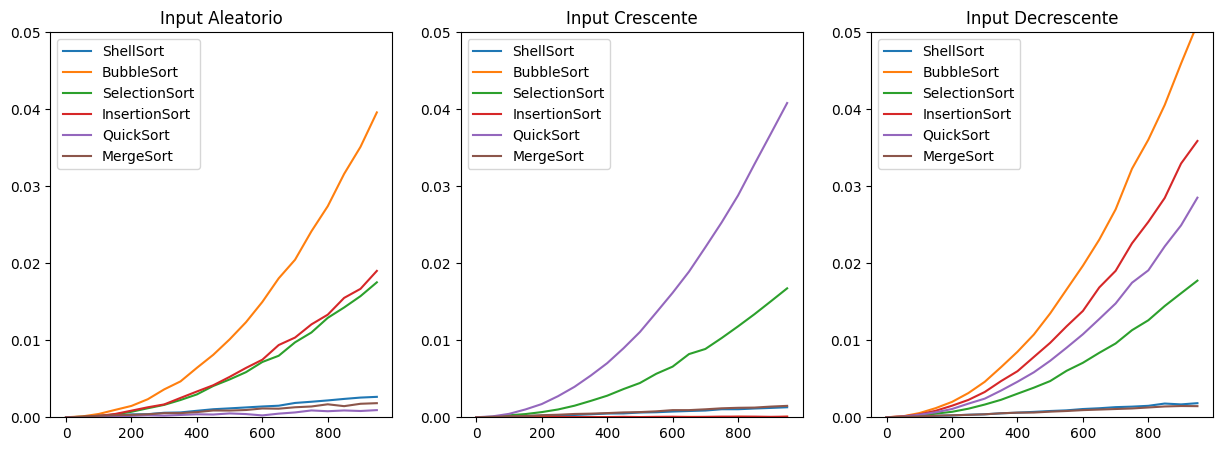

In [11]:
plt.rcParams["figure.figsize"] = [15,5]

plt.subplot(1,3,1)
plt.title("Input Aleatorio")
plt.plot(NShell, TShell, label='ShellSort')
plt.plot(NBubble, TBubble, label='BubbleSort')
plt.plot(NSelection, TSelection, label='SelectionSort')
plt.plot(NInsertion, TInsertion, label='InsertionSort')
plt.plot(NQuick, TQuick, label='QuickSort')
plt.plot(NMerge, TMerge, label='MergeSort')
plt.legend(loc='best')
plt.ylim(0,0.05)
plt.subplot(1,3,2)
plt.title("Input Crescente")
plt.plot(NShellB, TShellB, label='ShellSort')
plt.plot(NBubbleB, TBubbleB, label='BubbleSort')
plt.plot(NSelectionB, TSelectionB, label='SelectionSort')
plt.plot(NInsertionB, TInsertionB, label='InsertionSort')
plt.plot(NQuickB, TQuickB, label='QuickSort')
plt.plot(NMergeB, TMergeB, label='MergeSort')
plt.legend(loc='best')
plt.ylim(0,0.05)
plt.subplot(1,3,3)
plt.title("Input Decrescente")
plt.plot(NShellW, TShellW, label='ShellSort')
plt.plot(NBubbleW, TBubbleW, label='BubbleSort')
plt.plot(NSelectionW, TSelectionW, label='SelectionSort')
plt.plot(NInsertionW, TInsertionW, label='InsertionSort')
plt.plot(NQuickW, TQuickW, label='QuickSort')
plt.plot(NMergeW, TMergeW, label='MergeSort')
plt.legend(loc='best')
plt.ylim(0,0.05)
plt.show()

#### 5/6. Que conclusoes podemos retirar da analise dos graficos? Ha alguma diferenca quando o input muda?

Na célula de código acima, conseguimos observar 3 gráficos em que a única coisa que os difere e o input inicial: Input ordenado aleatoriamente, Input ordenado de maneira ascendente e Input ordenado de maneira descendente.

Na tabela abaixo estão inseridos os tempos de complexidade conhecidos dos algoritmos para o melhor, médio e pior caso


| Algoritmo            | Best Time Complexity  | Average Time Complexity | Worst Time Complexity |
|:---------------------|:---------------------:|:-----------------------:|:---------------------:|
| BubbleSort           |         O(N)          |     O(N^2)              |    O(N^2)             |
| SelectionSort        |        O(N^2)         |         O(N^2)          |        O(N^2)         |
| InsertionSort        |         O(N)          |         O(N^2)          |        O(N^2)         |
| ShellSort            |      O(Nlog(N))       |       O(Nlog(N))        |        O(N^2)         |
| MergeSort            |      O(Nlog(N))       |       O(Nlog(N))        |      O(Nlog(N))       |
| QuickSort            |      O(Nlog(N))       |       O(Nlog(N))        |        O(N^2)         |
<br>

#### <font color=#A06A3A>BubbleSort</font>
O BubbleSort e um dos algoritmos de ordenacao mais simples que existe. Ele baseia-se em analisar o array inteiro **N** vezes, sendo que a cada iteracao, um numero fica na posicao correta. Sendo o array de tamanho N a sua complexidade em average fica O(N^2). A sua performance pode e foi melhorada ao verificar se o array ja estaria ordenado antes de comecar outra iteracao, desta forma conseguimos evitar um bom numero de comparacoes e ate a baixar a sua complexidade em certos casos.
Quando o **BubbleSort** recebe um input crescente ele é um dos mais rápidos. Podemos reparar nisto tanto pelo gráfico como pela tabela. Isto acontece pois o **BubbleSort** apenas fica em execução **enquanto o input nao está ordenado** gracas as alteracoes feitas. Visto que o input testado no melhor caso era exatamente um input ordenado ascendentemente, então apenas percorremos uma vez o array, obtendo assim o O(N) tabelado. No Input decrescente vemos que a curva possui valores ligeiramente maiores do que o caso médio, pois quando o input se encontra nesta forma e quando os números se encontram o mais longe possível da posição pretendida, e sendo o BubbleSort um algoritmo limitado a trocas entre elementos adjacentes, o número de operações de swap maximiza.
<br>

#### <font color=#5DA15D>SelectionSort</font>
A forma como o SelectionSort funciona e a seguinte: para cada posicao do array, procurar qual o numero mais pequeno que esteja a frente dessa posicao e trocar. Como e obvio que este metodo ira exigir bastantes comparacoes, porque cada numero sera comparado com todos os numeros a sua frente independentemente de como esteja organizado o array. Logo, para cada elemento temos de percorrer N/2 elementos em media, resultando num total de **N(N-1)/2** comparações e um  número de trocas entre **0** e **N-1** dependendo da dificuldade do caso, não alterando a complexidade final.
Podemos entao concluir que o **SelectionSort** é um algoritmo que não deixa a sua performance ser notavelmente afetada pelo seu input.
<br>

#### <font color=#954B4C>InsertionSort</font>
O **InsertionSort** e o **BubbleSort** funcionam de formas semelhantes, na medida em que ambos trocam elementos adjacentes apenas se for necessário. No entanto, a nossa implementação do **InsertionSort** nao se restringe a apenas trocas adjacentes, de modo a melhorar ligeiramente a performance, mas o princípio de trocar elementos apenas se for necessário mantém-se.
A discrepância de performance entre os dois é justificada pelo facto de o **InsertionSort** manter uma "memória" do que já foi ordenado, evitando assim comparações desnecessárias. Daí ambos terem o mesmo nível de complexidade nos mesmos casos e curvas que se "acompanham"
<br>

#### <font color=#5384A6>ShellSort</font>
O **ShellSort** é o primeiro algoritmo que falámos que possui uma complexidade de O(Nlog(N)), que para além de depender da sua implementação como todos os outros, depende também da sequência usada para determinar a **gap**. O método original para o fazer seria dividir o input ao meio continuamente, contudo, foram descobertas outras sequências que comprometem a uma melhor performance. Na nossa implementação utilizámos a sequência de **Knuth** que aprendemos em AED $(3^K-1)$ pois é das mais eficientes na generalidade.
Conseguimos afirmar que o **ShellSort** é por si uma melhoria do algoritmo **InsertionSort**: O facto de o **InsertionSort** ser O(N^2) no caso médio/pior deve-se aos N números poderem estar a N de distância uns dos outros, o **ShellSort** aproveita esta falha e tenta minimizar as distâncias através do sorting por gaps. Portanto seria de esperar que este algoritmo se comportasse melhor do que o **InsertionSort**, herdando apenas o pior caso que acontece quando na eventualidade do input estar inversamente ordenado, a gap so poder obter um valor máximo de 1, o que indica que basicamente estariamos a fazer um **InsertionSort** com passos extra.
<br>

#### <font color=#8D706A>MergeSort</font>
O **MergeSort** é o único algoritmo que possui uma complexidade de O(Nlog(N)) para todos os seus casos. O algoritmo tem um custo de N para o merge das duas chamadas recursivas N/2. Já quando o array apenas tem 1 elemento, o algoritmo executa apenas uma comparação resultando na seguinte fórmula de complexidade temporal:
<br>
<img src="https://i.imgur.com/oiFGzHc.png" width=300 height=150/>

Se partirmos de um N asbtrato e iterarmos esta fórmula manualmente, chegaremos à seguinte fórmula onde K é o número da iteração:
<br>
<img src="https://i.imgur.com/JQ4OCuz.png" width=300 height=150/>

As iterações só irão parar assim que chegarmos a $N/2^k = 1$, ou seja, $log(N)=K$.
Se pegarmos nesta última fórmula e substituirmos o que acabamos de descobrir, chegamos ao resultado **n+nlog(n)** provando assim que o MergeSort segue sempre **O(NLog(N))**
<br>
#### <font color=#67547A>QuickSort</font>
O **QuickSort** é um dos casos mais peculiares desta experiência, pois quando lhe é dada uma lista ordenada é quando demonstra os piores resultados. Isto é nem mais nem menos pela forma como escolhemos o **pivot**: no nosso caso utilizámos sempre o elemento mais à direita para repartir o array e iterar as duas partições, só que no caso de uma lista ordenada quer de maneira crescente ou descrescente, o pivot será sempre um dos extremos do resultado, criando partições desbalanceadas de 0 e N-1 elementos. Portanto no pior dos casos o algoritmo terá que fazer N partições de N-1 elementos até que N-1 seja igual a 1, seguindo um tempo quadrático.
A razão do algoritmo se comportar "menos mal" quando dado um input descendente aquando dum ascendente, são a quantidade de trocas entre a posição analisada e o ponteiro secundário que se tem de realizar pelo meio, no entanto ambos possuem a mesma complexidade.

###### Uma solução popular para evitar este problema passa por simplesmente baralhar o input antes de iniciar o processo de QuickSort, deste modo, seguir um tempo quadrático fica bastante mais improvável. (Tambem existem outros metodos)

Seguindo a mesma lógica da análise do algoritmo **MergeSort**, o **QuickSort** também divide o array em dois para fazer as recursões seguintes, só que contrariamente ao **MergeSort**, este algoritmo não divide sempre o array em metade mas sim numa partição específica de índice K, desta forma obtemos uma fórmula minimamente semelhante:
<br>
<img src="https://i.imgur.com/yKuGL6u.png" width=400 height=200/>

Se as partições forem criadas algures pela metade do input, o algoritmo seguirá a mesma fórmula que o MergeSort, caso contrário $k=0 => T(n) = T(n-1)+n$ até n-1 ser igual a 1, o que criará o tal tempo quadrático de O(N^2).
Um aspeto positivo que o **QuickSort** possui sobre o **MergeSort** é o facto de ser um algoritmo **in-place**, na medida em que não necessita de alocar mais memória para arrays auxiliares, o que ajuda a diminuir o número de trocas e a eficiência de acesso a memória, tornando a sua performance melhor por média.











***
### 7. Usando o Método Indutivo, demonstre que o algoritmo de Seleção Linear funciona

O Algoritmo de Seleção Linear, mais conhecido por **SelectionSort**, é utilizado para ordenar uma **lista** de valores e funciona da seguinte forma:

```

    N = Tamanho da Lista
    Para i de 0 até N faz
        index_do_menor = i
        Para j de i+1 ate N faz
            Se Lista[j] < Lista[index_do_menor] então
                index_do_menor = j
        Trocar Lista[i] e Lista[index_do_menor]

```

De modo a verificarmos que o algoritmo funciona e cumpre o seu objetivo, usaremos o Método Indutivo.



Para tal, precisamos de comecar por definir a nossa Base de Indução, usaremos para este caso quando N=1, ou seja, quando a Lista apenas possui um elemento e que portanto já se encontra obrigatoriamente ordenada.

O próximo passo será induzir a nossa Hipótese de Indução, onde vamos assumir que o algoritmo funciona para uma lista com N elementos

Para finalizar, a Tese de Indução, onde nos basta provar a partir do que já construimos que o algoritmo funciona também para qualquer lista com N+1 elementos:
- Partimos de uma lista com N+1 elementos
- Na primeira iteração do primeiro loop o elemento mais pequeno é colocado na primeira posição da lista com N+1 elementos
- Agora obtemos um minimo que se encontra na primeira posição e uma lista com N elementos pra colocar nos N espacos apos o minimo
- Sabemos que o algoritmo funciona para listas de N elementos
- Logo, sabemos que todos os números que procedem o minimo serão organizados com sucesso
- Sendo o minimo da Lista de N+1 elementos menor ou igual que o minimo da Lista com N elementos concluimos que o algoritmo funciona pra N+1


#### Formalização

**Simbolismos:**
- L(N) - Lista com tamanho N
- Org(L) - Lista L está organizada
    - Org(L(N)) para qualquer L quando N=1
    - Org(L(N)) para qualquer L quando para qualquer i,j em que i<j: L[i]<=L[j]
- A(L) - Algoritmo funciona na Lista L (O algoritmo partiu de L para O(L))
- Min(L) - Valor minimo da Lista L

**Base de Indução:** A(L(1)) ???
- L(1) => Org(L(1)) => A(L(1))

**Hipótese de Indução:** para qualquer N -> A(L(N)) !!!

**Tese de Indução:** A(L(N+1)) ???
- L(N+1) = Min(L(N+1)) + L(N) &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; .1a iteração
- Min(L(N+1)) + L(N) = Min(L(N+1)) + Org(L(N))  &emsp;&emsp;&emsp;&emsp;&nbsp;        .Hipotese de Indução + Aplicação do Algoritmo
- Min(L(N+1)) + Org(L(N)) = Org(Min(L(N+1)) + L(N))  &emsp;&emsp;     .Min(L(N+1)) <= Min(L(N)) + def. Org()
- Org(Min(L(N+1)) + L(N)) = Org(L(N+1))        &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;          .X+L(N) = L(N+1)
- Org(L(N+1)) = A(L(N+1))                  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;             .def. A()





